In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
#from seaborn import boxplot, displot

In [2]:
#Importar os dados
dataset = pd.read_csv('Churn.csv',sep=";")
dataset

X0   X1  X2         X3  X4  X4.1        X6  X7  X8  X9         X10  X11
0       1  619  RS   Feminino  42     2         0   1   1   1  10134888.0    1
1       2  608  SC   Feminino  41     1   8380786   1   0   1  11254258.0    0
2       3  502  RS   Feminino  42     8   1596608   3   1   0  11393157.0    1
3       4  699  RS   Feminino  39     1         0   2   0   0   9382663.0    0
4       5  850  SC   Feminino  43     2  12551082   1   1   1    790841.0    0
..    ...  ...  ..        ...  ..   ...       ...  ..  ..  ..         ...  ...
994   996  838  SC  Masculino  43     9  12310588   2   1   0  14576583.0    0
995   997  610  SC  Masculino  29     9         0   3   0   1   8391224.0    0
996   998  811  SC  Masculino  44     3         0   2   0   1   7843973.0    0
997   999  587  SC  Masculino  62     7  12128627   1   0   1    677692.0    0
998  1000  811  PR   Feminino  28     4  16773882   2   1   1    990342.0    0

[999 rows x 12 columns]

In [3]:
#tamanho rows x columns
dataset.shape #equivale ao dim(dataset) do R

(999, 12)

In [4]:
#Primeiro problema: Dar nome às colunas:
dataset.columns =["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]
dataset

Id  Score Estado     Genero  Idade  Patrimonio     Saldo  Produtos  \
0       1    619     RS   Feminino     42           2         0         1   
1       2    608     SC   Feminino     41           1   8380786         1   
2       3    502     RS   Feminino     42           8   1596608         3   
3       4    699     RS   Feminino     39           1         0         2   
4       5    850     SC   Feminino     43           2  12551082         1   
..    ...    ...    ...        ...    ...         ...       ...       ...   
994   996    838     SC  Masculino     43           9  12310588         2   
995   997    610     SC  Masculino     29           9         0         3   
996   998    811     SC  Masculino     44           3         0         2   
997   999    587     SC  Masculino     62           7  12128627         1   
998  1000    811     PR   Feminino     28           4  16773882         2   

     TemCartCredito  Ativo     Salario  Saiu  
0                 1      1  10134888.0     1  
1                 0      1  11254258.0     0  
2                 1      0  11393157.0     1  
3                 0      0   9382663.0     0  
4                 1      1    790841.0     0  
..              ...    ...         ...   ...  
994               1      0  14576583.0     0  
995               0      1   8391224.0     0  
996               0      1   7843973.0     0  
997               0      1    677692.0     0  
998               1      1    990342.0     0  

[999 rows x 12 columns]

# Analise exploratória

## Explorando dados Categóricos


### 1) Estado

In [5]:
estadoAgrupado = dataset.groupby("Estado").size()

<AxesSubplot:xlabel='Estado'>

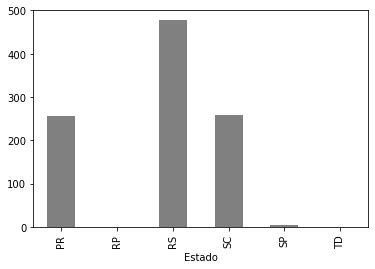

In [6]:
estadoAgrupado
#Dados fora de domínio: RP e TD não são estados, e SP não faz parte do domínio
estadoAgrupado.plot.bar(color = "gray")

### 2) Gênero

In [7]:
generoAgrupado = dataset.groupby(["Genero"]).size()
#Dados categóricos diferentes mas de mesma semântica
generoAgrupado



Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

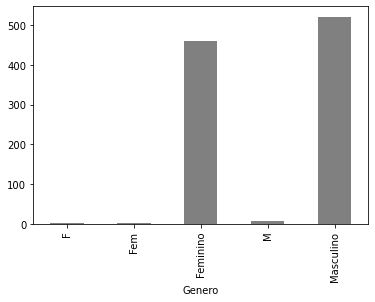

In [8]:
generoAgrupado.plot.bar(color = "gray")

## Colunas Numéricas

### 3) Score

In [66]:
dataset["Score"].describe() #equivale ao summar(dataset$coluna) do R


count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

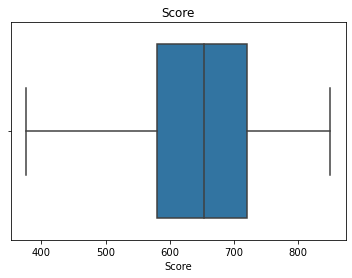

In [69]:
srn.boxplot(x = dataset["Score"]).set_title("Score")


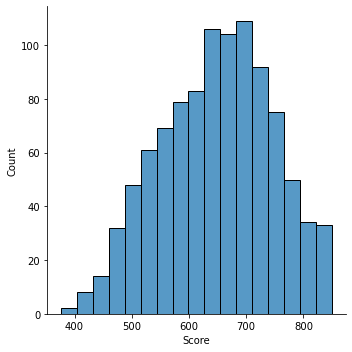

In [73]:
srn.displot(dataset['Score']) #equivale ao hist(dataset$Column) do R

### 4)Idade

In [86]:
idadeAgrup = dataset['Idade'].describe()
#Dados fora de domínio: valores negativos e muito superior a idade humana!
idadeAgrup

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

<AxesSubplot:xlabel='Idade'>

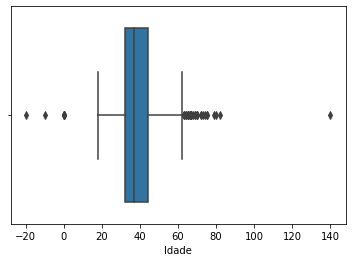

In [89]:
srn.boxplot(x=dataset['Idade'])

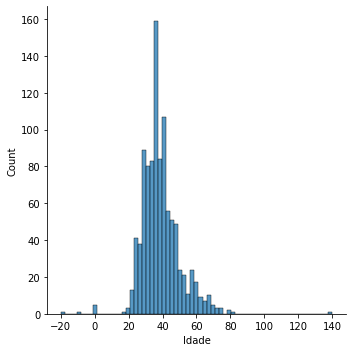

In [91]:
srn.displot(dataset['Idade'])

In [10]:
saldoAgrup = dataset['Saldo'].describe()
saldoAgrup

0             0
1       8380786
2       1596608
3             0
4      12551082
         ...   
994    12310588
995           0
996           0
997    12128627
998    16773882
Name: Saldo, Length: 999, dtype: int64

<AxesSubplot:xlabel='Saldo'>

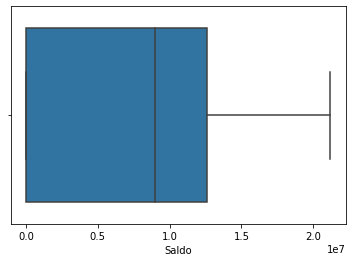

In [114]:
srn.boxplot(x = dataset['Saldo'])

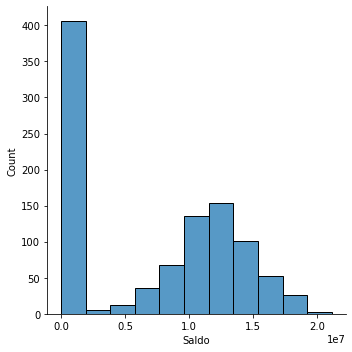

In [14]:
srn.displot(dataset['Saldo'])

In [11]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

<AxesSubplot:xlabel='Salario'>

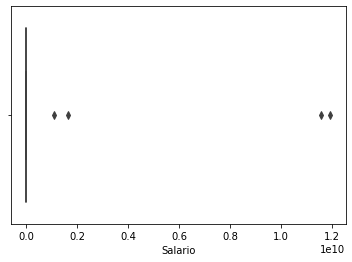

In [11]:
boxplot(x = dataset['Salario'])

0      10134888.0
1      11254258.0
2      11393157.0
3       9382663.0
4        790841.0
          ...    
994    14576583.0
995     8391224.0
996     7843973.0
997      677692.0
998      990342.0
Name: Salario, Length: 999, dtype: float64

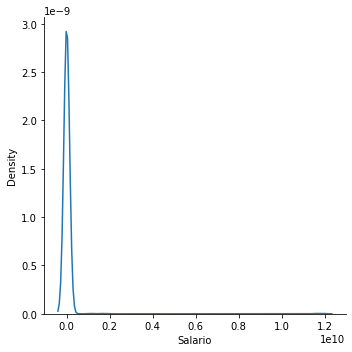

In [19]:
srn.displot(data = dataset['Salario'],kind='kde')
dataset['Salario']

## Dados Nulos

In [25]:
dataset.isnull() #equivale ao is.na(dataset) no R
dataset.isnull().sum()


Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

## Resolvendo Problemas

### Dados nulos

In [110]:
dataset['Salario'].describe()

count    9.880000e+02
mean     3.539406e+07
std      5.316513e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [111]:
median = sts.median(dataset['Salario'])
median

20792.0

In [115]:
#median = o que vai substituir, inplace = vai substituir no próprio dataset
dataset['Salario'].fillna(median, inplace=True) #equivale ao dataset[is.na(dataset)]$Salario = mediana, no R

In [116]:
dataset['Salario'].isnull().sum()

0

In [38]:
topCategorico = dataset['Genero'].describe().top
topCategorico


'Masculino'

In [41]:
dataset.groupby('Genero').size()
dataset['Genero'].fillna(topCategorico,inplace=True)
dataset['Genero'].isnull().sum()

0

In [44]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

### Dados categóricos diferentes mas de mesma semântica



In [7]:
dataset.groupby(['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [8]:
#Retorna a quantidade de dados iguais aos informados na lista de isin()
dataset['Genero'].isin(['F','Fem']).sum()

3

In [9]:
dataset.loc[dataset['Genero'] == 'M','Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['F','Fem']),'Genero'] = 'Feminino'


In [10]:
dataset.groupby(['Genero']).size()

Genero
Feminino     464
Masculino    527
dtype: int64

### Dados numéricos fora de domínio

In [21]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [23]:
#necessário englobar os verificadores entre parênteses!
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]['Idade']

867    -10
984    -20
990    140
Name: Idade, dtype: int64

In [22]:
#mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [61]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []

### Dados categóricos fora de domínio

In [73]:
agrupado = dataset.groupby(['Estado']).size()
#TD e RP não são estados, e São Paulo não 
agrupado

Estado
37      3
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [75]:
#Descubro a Moda
moda = dataset['Estado'].describe().top
moda

'RS'

In [92]:
#Atribuo a Moda aos dados fora de domínio!
#metodo 1)
dataset.loc[(dataset['Estado'] == 'TD') | (dataset['Estado'] == 'RP') | (dataset['Estado'] == 'SP')] #= 'RS'

#Metodo 2, mais adequado:
dataset.loc[dataset['Estado'].isin(['TD','RP','SP'],),'Estado'] = 'RS'
dataset.loc[dataset['Estado'].isin(['TD','RP','SP'],),]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []

### Dados duplicados

In [57]:
    dataset[dataset.duplicated('Id',keep = False)]

Id  Score Estado    Genero  Idade  Patrimonio    Saldo  Produtos  \
80  81    665     RS  Feminino     34           1  9664554         2   
81  81    665     RS  Feminino     34           1  9664554         2   

    TemCartCredito  Ativo     Salario  Saiu  
80               0      0  17141366.0     0  
81               0      0  17141366.0     0

In [93]:
#excluindo os dados pelo Id
dataset.drop_duplicates(subset='Id',keep = 'first',inplace=True)

dataset[dataset.duplicated('Id',keep = False)]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []

### Outliers

<AxesSubplot:xlabel='Salario'>

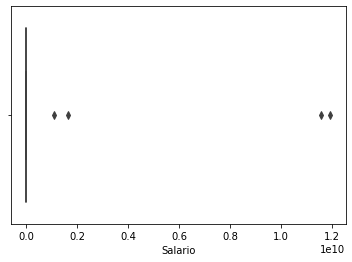

In [104]:
srn.boxplot(x = dataset['Salario'])

In [117]:
desv = sts.stdev(dataset['Salario'])
desv

529784200.81027097

In [119]:
#definimos uma regra que trataremos como outliers aqueles que forem maiores que duas vezes o Desvio Padrão
dataset.loc[(dataset['Salario'] > 2 * desv)]

Id  Score Estado     Genero  Idade  Patrimonio     Saldo  Produtos  \
7      8    376     PR   Feminino     29           4  11504674         4   
116  118    668     PR   Feminino     37           6   1678644         1   
170  172    484     RS   Feminino     29           4  13011439         1   
230  232    673     RS  Masculino     72           1         0         2   

     TemCartCredito  Ativo       Salario  Saiu  
7                 1      0  1.193469e+10     1  
116               1      0  1.156383e+10     0  
170               1      0  1.640179e+09     0  
230               0      1  1.119812e+09     0

In [120]:
#procuro a mediana
mediana = sts.median(dataset['Salario'])
mediana

8641028.0

In [121]:
#Elimino os outliers
dataset.loc[(dataset['Salario'] > 2 * desv)] = mediana
dataset.loc[(dataset['Salario'] > 2 * desv)]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []

In [128]:
dataset.head()

Id  Score Estado    Genero  Idade  Patrimonio     Saldo  Produtos  \
0   1    619     RS  Feminino     42           2         0         1   
1   2    608     SC  Feminino     41           1   8380786         1   
2   3    502     RS  Feminino     42           8   1596608         3   
3   4    699     RS  Feminino     39           1         0         2   
4   5    850     SC  Feminino     43           2  12551082         1   

   TemCartCredito  Ativo     Salario  Saiu  
0               1      1  10134888.0     1  
1               0      1  11254258.0     0  
2               1      0  11393157.0     1  
3               0      0   9382663.0     0  
4               1      1    790841.0     0

In [129]:
dataset.shape

(995, 12)